# Text Mining - Text Prepartaion with different Stemmers and Frequency Distribution

In [1]:
import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
nltk.download('punkt')

In [43]:
#use nltk.download() and download only books. Using full download will takeup time and bandwidth
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('wordnet')
!pip install newspaper3k

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


![title](https://github.com/mohameddhameem/TextMining/blob/master/img/nltk_download.png?raw=1)

In [7]:
#get a demo article and load it to memory
from newspaper import Article
url = 'http://www.slate.com/articles/life/food/2015/08/i_was_gluten_free_before_it_was_cool_diagnosed_with_celiac_in_the_1990s.html'
article = Article(url)
article.download()
# data = open('Demo_Article.json','r')
article.html
article.parse()
article.authors


['Laura Bennett']

In [9]:
text=article.text


'I was 9 years old when I first heard the word gluten. “You can’t eat gluten anymore,” my mom informed me after we’d left the doctor’s office. “No more spaghetti.” Her face suggested this was good news. I hadn’t gained weight in more than a year and I looked like a tiny goblin with bangs. The doctor had described my predicament as “failure to thrive.” But I was a pasta machine. As far as my third-grade self was concerned, no food was more perfect than noodles: so blandly reliable, such a useful vehicle for cheese.\n\nAdvertisement\n\nI was crushed. It was the fall of 1995, and the Atkins diet hadn’t begun to vilify carbs in the America dietary imagination. Also, gluten sounded made-up. What was gluten? The word itself, that cartoonish little “oo,” seemed too dopey to mean anything at all. The first time my mom brought home gluten-free bread—a sickly, bleached loaf as dense as a paperweight—I could not believe it was food. I would wander sorrowfully down the supermarket aisles, beholdin

In [11]:
type(text)

str

In [10]:
len(text)

10213

In [17]:
# Convert the free text into tokens
tokens = word_tokenize(text)
print(tokens)
type(tokens)

['I', 'was', '9', 'years', 'old', 'when', 'I', 'first', 'heard', 'the', 'word', 'gluten', '.', '“', 'You', 'can', '’', 't', 'eat', 'gluten', 'anymore', ',', '”', 'my', 'mom', 'informed', 'me', 'after', 'we', '’', 'd', 'left', 'the', 'doctor', '’', 's', 'office', '.', '“', 'No', 'more', 'spaghetti.', '”', 'Her', 'face', 'suggested', 'this', 'was', 'good', 'news', '.', 'I', 'hadn', '’', 't', 'gained', 'weight', 'in', 'more', 'than', 'a', 'year', 'and', 'I', 'looked', 'like', 'a', 'tiny', 'goblin', 'with', 'bangs', '.', 'The', 'doctor', 'had', 'described', 'my', 'predicament', 'as', '“', 'failure', 'to', 'thrive.', '”', 'But', 'I', 'was', 'a', 'pasta', 'machine', '.', 'As', 'far', 'as', 'my', 'third-grade', 'self', 'was', 'concerned', ',', 'no', 'food', 'was', 'more', 'perfect', 'than', 'noodles', ':', 'so', 'blandly', 'reliable', ',', 'such', 'a', 'useful', 'vehicle', 'for', 'cheese', '.', 'Advertisement', 'I', 'was', 'crushed', '.', 'It', 'was', 'the', 'fall', 'of', '1995', ',', 'and', 

list

In [15]:
#identify unique words and single char words
print(len(tokens))
unique = set(tokens)
print('# of Unique tokens',len(unique))
print('# of tokens / len of unique tokens',len(tokens)/len(unique))

1992
# of Unique tokens 863
# of tokens / len of unique tokens 2.3082271147161064


In [18]:
#lets sort here
sorted(unique)
single=[w for w in unique if len(w) == 1 ]
print(len(single))
single

21


['a',
 's',
 '.',
 '(',
 ',',
 '/',
 '”',
 '2',
 '?',
 ':',
 '“',
 '*',
 'A',
 'I',
 ';',
 '’',
 'm',
 '9',
 'd',
 't',
 ')']

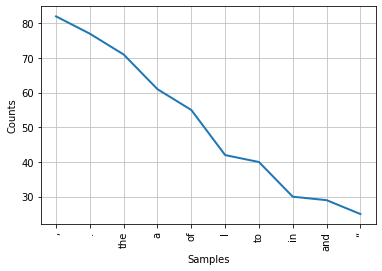

In [19]:
# Frequency distribution of the words
%matplotlib inline
tokens.count('gluten')
fd = nltk.FreqDist(tokens)
fd.most_common(10)
fd.plot(10)

In [20]:
# How long are the words?
fd_wlen = nltk.FreqDist([len(w) for w in unique])
fd_wlen

FreqDist({1: 21,
          2: 41,
          3: 82,
          4: 136,
          5: 122,
          6: 120,
          7: 105,
          8: 78,
          9: 54,
          10: 39,
          11: 29,
          12: 11,
          13: 12,
          14: 7,
          15: 3,
          16: 1,
          20: 1,
          21: 1})

In [23]:
#bigrams and trigrams
bigr = nltk.bigrams(tokens) #[:10]
trigr = nltk.trigrams(tokens)
#tokens[:10]
# list(bigr)
list(trigr)

[('I', 'was', '9'),
 ('was', '9', 'years'),
 ('9', 'years', 'old'),
 ('years', 'old', 'when'),
 ('old', 'when', 'I'),
 ('when', 'I', 'first'),
 ('I', 'first', 'heard'),
 ('first', 'heard', 'the'),
 ('heard', 'the', 'word'),
 ('the', 'word', 'gluten'),
 ('word', 'gluten', '.'),
 ('gluten', '.', '“'),
 ('.', '“', 'You'),
 ('“', 'You', 'can'),
 ('You', 'can', '’'),
 ('can', '’', 't'),
 ('’', 't', 'eat'),
 ('t', 'eat', 'gluten'),
 ('eat', 'gluten', 'anymore'),
 ('gluten', 'anymore', ','),
 ('anymore', ',', '”'),
 (',', '”', 'my'),
 ('”', 'my', 'mom'),
 ('my', 'mom', 'informed'),
 ('mom', 'informed', 'me'),
 ('informed', 'me', 'after'),
 ('me', 'after', 'we'),
 ('after', 'we', '’'),
 ('we', '’', 'd'),
 ('’', 'd', 'left'),
 ('d', 'left', 'the'),
 ('left', 'the', 'doctor'),
 ('the', 'doctor', '’'),
 ('doctor', '’', 's'),
 ('’', 's', 'office'),
 ('s', 'office', '.'),
 ('office', '.', '“'),
 ('.', '“', 'No'),
 ('“', 'No', 'more'),
 ('No', 'more', 'spaghetti.'),
 ('more', 'spaghetti.', '”'),
 ('

In [25]:
#text preprocessing: remove punctuations
tokens_nop = [ t for t in tokens if t not in string.punctuation ]
tokens_nop

['I',
 'was',
 '9',
 'years',
 'old',
 'when',
 'I',
 'first',
 'heard',
 'the',
 'word',
 'gluten',
 '“',
 'You',
 'can',
 '’',
 't',
 'eat',
 'gluten',
 'anymore',
 '”',
 'my',
 'mom',
 'informed',
 'me',
 'after',
 'we',
 '’',
 'd',
 'left',
 'the',
 'doctor',
 '’',
 's',
 'office',
 '“',
 'No',
 'more',
 'spaghetti.',
 '”',
 'Her',
 'face',
 'suggested',
 'this',
 'was',
 'good',
 'news',
 'I',
 'hadn',
 '’',
 't',
 'gained',
 'weight',
 'in',
 'more',
 'than',
 'a',
 'year',
 'and',
 'I',
 'looked',
 'like',
 'a',
 'tiny',
 'goblin',
 'with',
 'bangs',
 'The',
 'doctor',
 'had',
 'described',
 'my',
 'predicament',
 'as',
 '“',
 'failure',
 'to',
 'thrive.',
 '”',
 'But',
 'I',
 'was',
 'a',
 'pasta',
 'machine',
 'As',
 'far',
 'as',
 'my',
 'third-grade',
 'self',
 'was',
 'concerned',
 'no',
 'food',
 'was',
 'more',
 'perfect',
 'than',
 'noodles',
 'so',
 'blandly',
 'reliable',
 'such',
 'a',
 'useful',
 'vehicle',
 'for',
 'cheese',
 'Advertisement',
 'I',
 'was',
 'crushed

In [27]:
# Convert all characters to Lower case
tokens_lower=[ t.lower() for t in tokens_nop ]

In [30]:
# Create a stopword list from the standard list of stopwords available in nltk
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [36]:
# Remove all these stopwords from the text
tokens_nostop=[ t for t in tokens_lower if t not in stop ]

In [37]:
#remove number like characters 
tokens_nostop = [x for x in tokens_nostop if not any(c.isdigit() for c in x)]

In [38]:
FreqDist(tokens_nostop).most_common(10)

[('“', 25),
 ('”', 25),
 ('gluten', 24),
 ('’', 24),
 ('advertisement', 19),
 ('like', 10),
 ('food', 8),
 ('gluten-free', 8),
 ('one', 6),
 ('first', 5)]

# Below section we will try different stemmer

In [39]:
porter = nltk.PorterStemmer()
tokens_porter=[ porter.stem(t) for t in tokens_nostop ] 
print(tokens_nostop[:10])
print(tokens_porter[:10])

['years', 'old', 'first', 'heard', 'word', 'gluten', '“', '’', 'eat', 'gluten']
['year', 'old', 'first', 'heard', 'word', 'gluten', '“', '’', 'eat', 'gluten']


In [40]:
# The Lancaster Stemmer - developed at Lancaster University
lancaster = nltk.LancasterStemmer()
tokens_lanc = [ lancaster.stem(t) for t in tokens_nostop ] 
print(tokens_lanc[:10])

['year', 'old', 'first', 'heard', 'word', 'glut', '“', '’', 'eat', 'glut']


In [41]:
# The snowball stemmer -  which supports 13 non-English languages as well!
snowball = nltk.SnowballStemmer('english')
tokens_snow = [ snowball.stem(t) for t in tokens_nostop ]
print(tokens_snow[:10])

['year', 'old', 'first', 'heard', 'word', 'gluten', '“', '’', 'eat', 'gluten']


In [44]:
# Now, for Lemmatization, which converts each word to it's corresponding lemma, use the Lemmatizer provided by nltk
wnl = nltk.WordNetLemmatizer()
tokens_lem = [ wnl.lemmatize(t) for t in tokens_nostop ]
print(tokens_lem[:25])

['year', 'old', 'first', 'heard', 'word', 'gluten', '“', '’', 'eat', 'gluten', 'anymore', '”', 'mom', 'informed', '’', 'left', 'doctor', '’', 'office', '“', 'spaghetti.', '”', 'face', 'suggested', 'good']


In [45]:
# Check the lemmatization results. Why are some words not lemmatized?
# The reason is it needs to know the POS of the words. The default is 'n'.
# We'll learn how to do POS tagging later.
print(wnl.lemmatize('absorbed', pos = 'v'))
print(wnl.lemmatize('better', pos = 'a'))

absorb
good


In [46]:
# Let's use Snowball Stemmer's result.
# Further cleaning: filter off anything with less than 3 characters
nltk.FreqDist(tokens_snow).most_common(100)
tokens_clean = [ t for t in tokens_snow if len(t) >= 3 ]
len(tokens_snow)
len(tokens_clean)
nltk.FreqDist(tokens_clean).most_common(50)
fd_clean = nltk.FreqDist(tokens_clean)

In [47]:
#below section is for Word Cloud
text_clean=" ".join(tokens_clean)

In [54]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import urllib

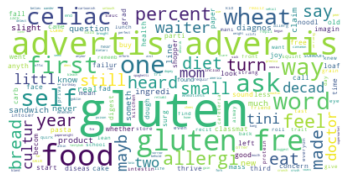

In [49]:
wc = WordCloud(background_color="white").generate(text_clean)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

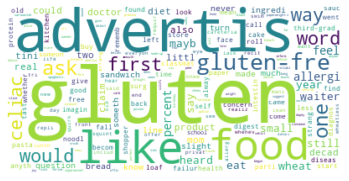

In [50]:
# We can also generate directly from the frequency information
wc2 = WordCloud(background_color="white")
wc2.generate_from_frequencies(fd_clean)
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()

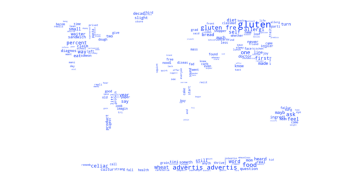

In [74]:
#Cloud with customized shape and color
png_url = "https://upload.wikimedia.org/wikipedia/commons/c/c3/BlankMap-World.png"
mask = np.array(Image.open(urllib.request.urlopen(png_url)))
# To get the color scheme from the image itself use the function below
# image_colors = ImageColorGenerator(mask)
#change the value in return to set the single color need, in hsl format.
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(49,51))

wc3 = WordCloud(background_color='white', mask=mask).generate(text_clean)

plt.imshow(wc3.recolor(color_func=grey_color_func))
plt.axis("off")
plt.show()